In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,f1_score,cohen_kappa_score
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression


In [3]:
df = pd.read_excel('spotify all combined.xlsx')

In [4]:
df.head()

track            artist  decade  \
0  Jealous Kind Of Fella     Garland Green      60   
1          Initials B.B.  Serge Gainsbourg      60   
2           Melody Twist       Lord Melody      60   
3         Mi Bomba SonÃ³        Celia Cruz      60   
4            Uravu Solla       P. Susheela      60   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417   0.620    3    -7.727   
1  spotify:track:5hjsmSnUefdUqzsDogisiX         0.498   0.505    3   -12.475   
2  spotify:track:6uk8tI6pwxxdVTNlNOJeJh         0.657   0.649    5   -13.392   
3  spotify:track:7aNjMJ05FvUXACPWZ7yJmv         0.590   0.545    7   -12.058   
4  spotify:track:1rQ0clvgkzWr001POOPJWx         0.515   0.765   11    -3.515   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0403         0.490          0.000000    0.0779    0.845   
1     1       0.0337         0.018          0.107000    0.1760    0.797   
2     1       0.0380         0.846          0.000004    0.1190    0.908   
3     0       0.1040         0.706          0.024600    0.0610    0.967   
4     0       0.1240         0.857          0.000872    0.2130    0.906   

     tempo  duration_ms  time_signature  chorus_hit  sections  target  
0  185.655       173533               3    32.94975         9       1  
1  101.801       213613               4    48.82510        10       0  
2  115.940       223960               4    37.22663        12       0  
3  105.592       157907               4    24.75484         8       0  
4  114.617       245600               4    21.79874        14       0

In [5]:
data = df

In [7]:
df.shape

(41106, 20)

In [8]:
df.columns

Index(['track', 'artist', 'decade', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'chorus_hit', 'sections', 'target'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   decade            41106 non-null  int64  
 3   uri               41106 non-null  object 
 4   danceability      41106 non-null  float64
 5   energy            41106 non-null  float64
 6   key               41106 non-null  int64  
 7   loudness          41106 non-null  float64
 8   mode              41106 non-null  int64  
 9   speechiness       41106 non-null  float64
 10  acousticness      41106 non-null  float64
 11  instrumentalness  41106 non-null  float64
 12  liveness          41106 non-null  float64
 13  valence           41106 non-null  float64
 14  tempo             41106 non-null  float64
 15  duration_ms       41106 non-null  int64  
 16  time_signature    41106 non-null  int64 

In [11]:
df.isnull().sum()

track               0
artist              0
decade              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [14]:
pd.crosstab(df['target'],df['mode'])

mode       0      1
target             
0       7057  13496
1       5548  15005

In [15]:
pd.crosstab(df['target'],df['decade'])

decade    0     10    60    70    80    90
target                                    
0       2936  3199  4321  3883  3454  2760
1       2936  3199  4321  3883  3454  2760

In [4]:
x = df.artist.value_counts()
x

Traditional          207
Harry Belafonte      140
P. Susheela          130
Ennio Morricone      128
Jerry Goldsmith      124
                    ... 
Voyce                  1
Johnny Laboriel        1
Tribe 8                1
Albert Burbank         1
The Neighbourhood      1
Name: artist, Length: 11904, dtype: int64

In [6]:
len(x)

11904

In [7]:
df.artist.nunique()

11904

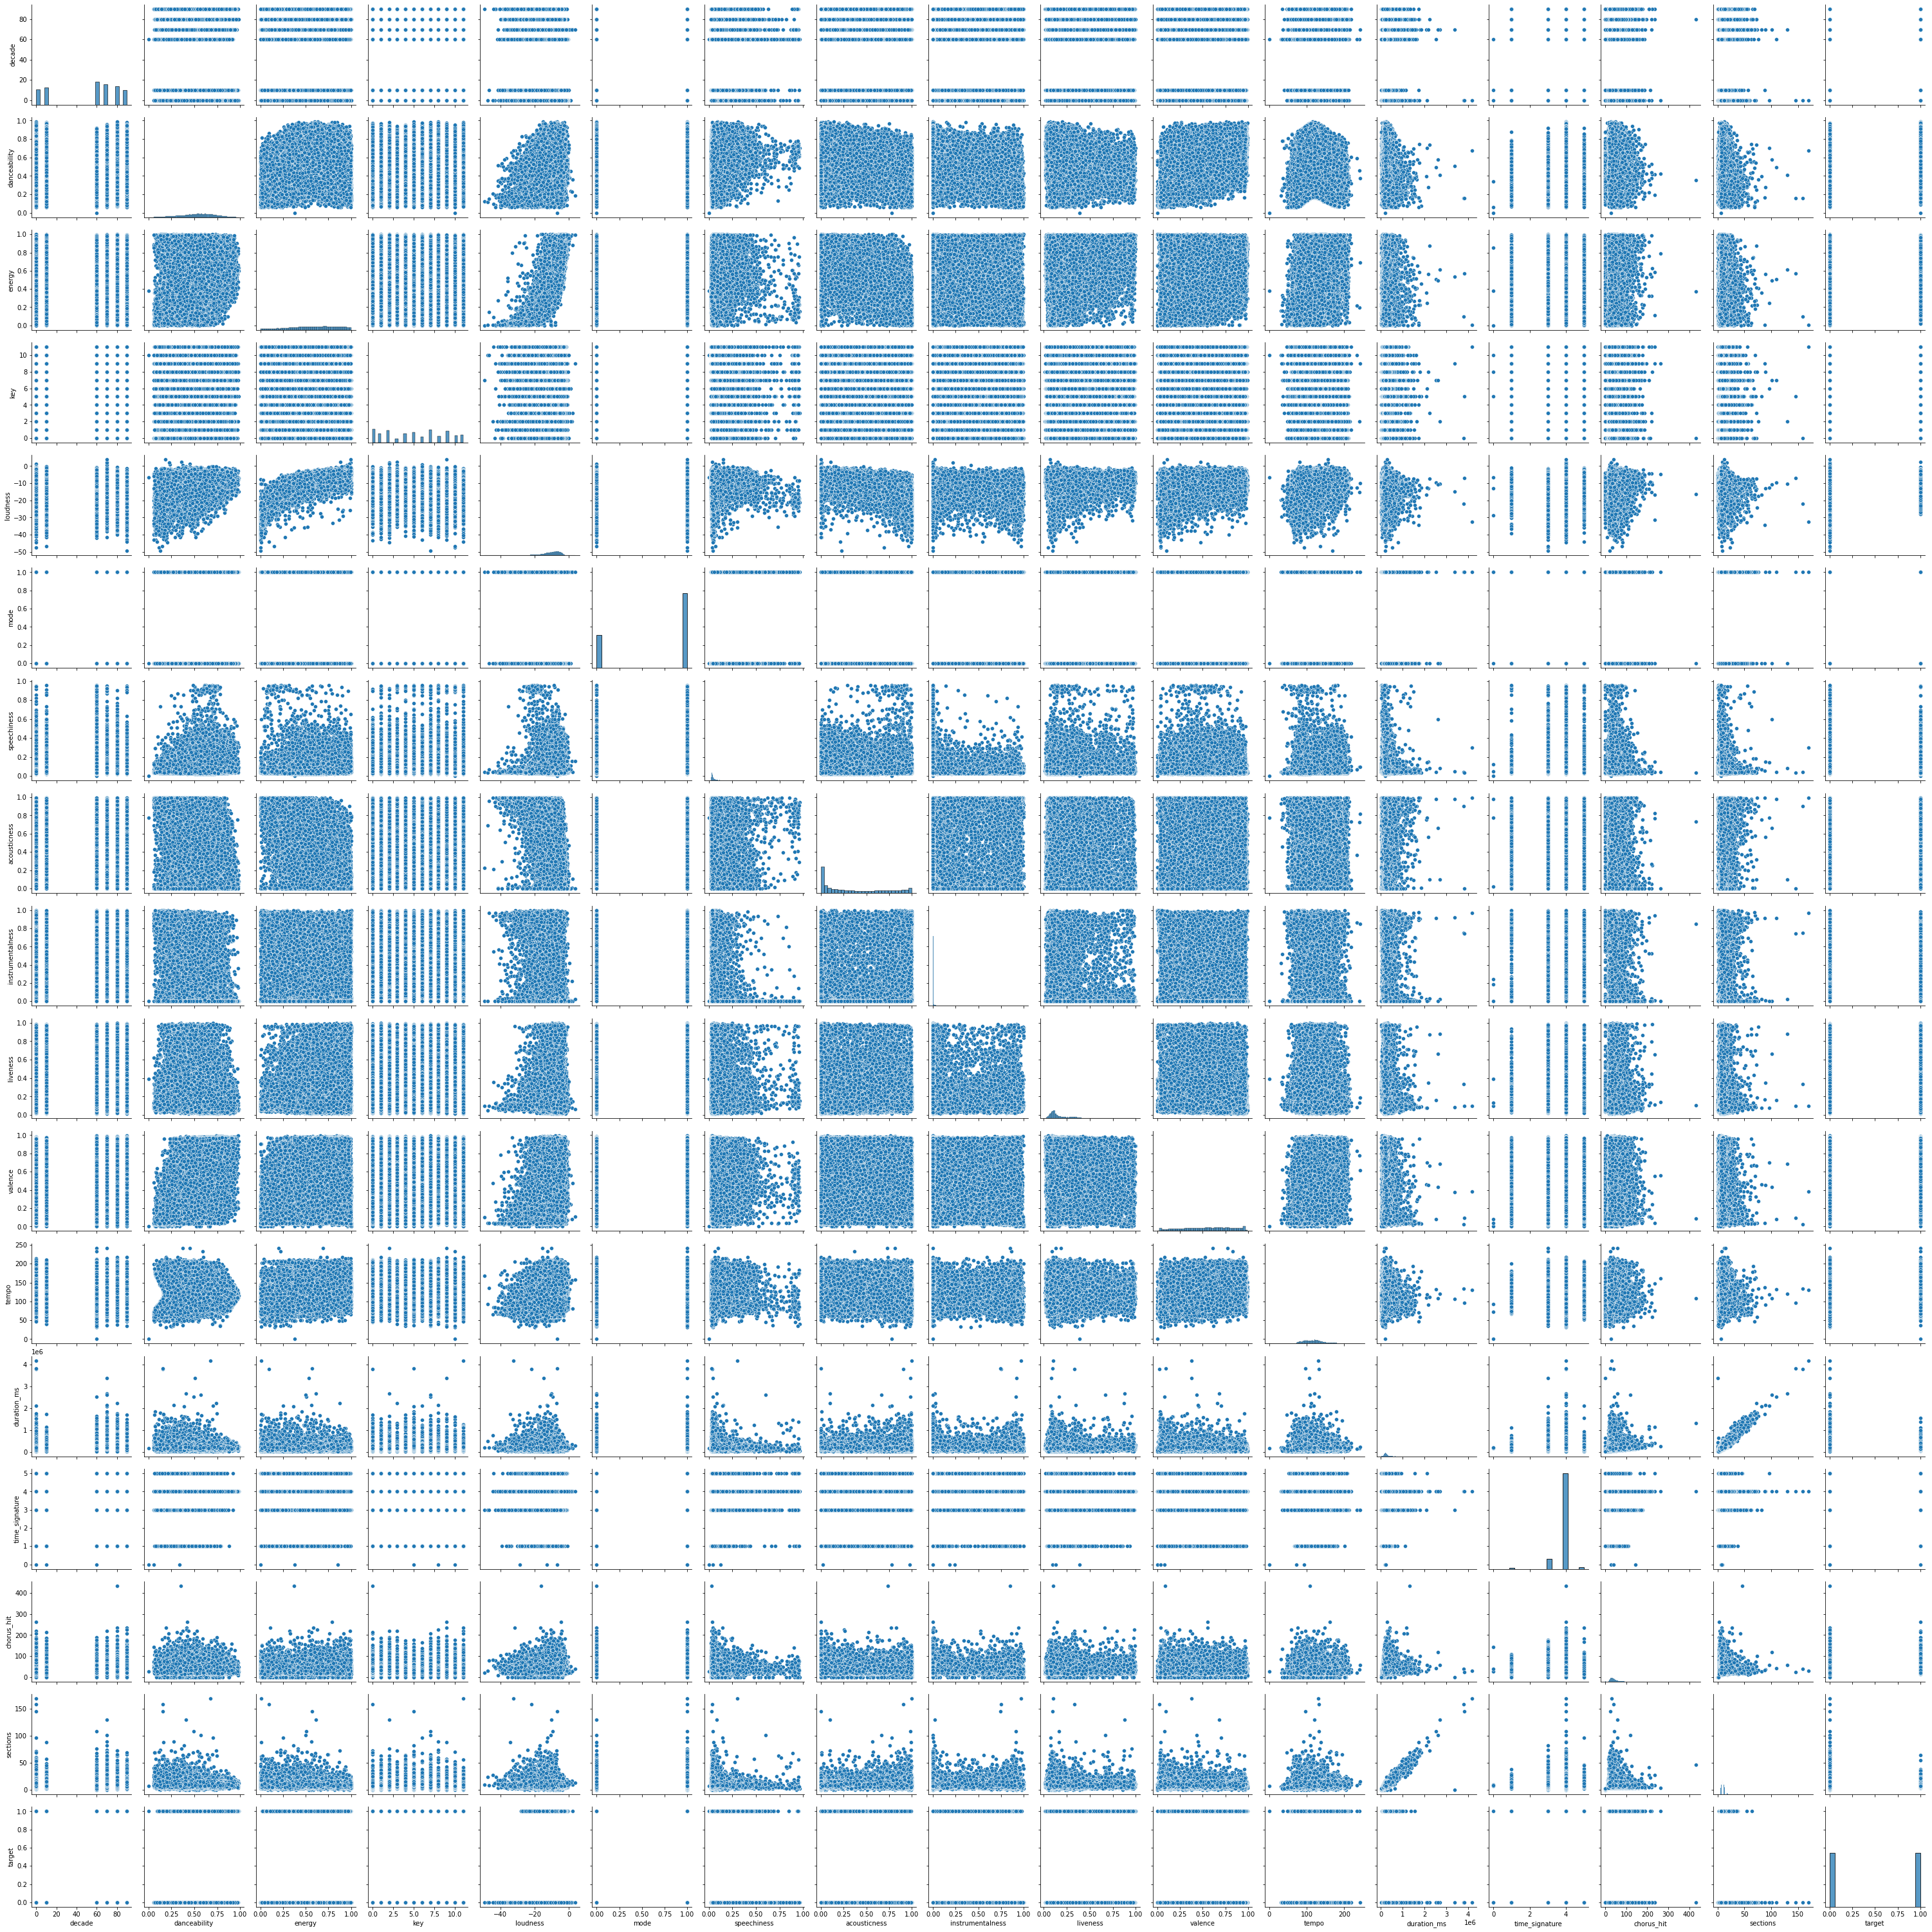

In [15]:
sns.pairplot(df)

In [17]:
df.decade.value_counts()

60    8642
70    7766
80    6908
10    6398
0     5872
90    5520
Name: decade, dtype: int64

In [16]:
df.sections.nunique()

84

In [11]:
df.dtypes

track                object
artist               object
decade                int64
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

In [17]:
df['mode'] = df['mode'].astype('object')
df['key'] = df['key'].astype('object')
df['time_signature'] = df['time_signature'].astype('object')
df['deacde'] = df['decade'].astype('object')

In [18]:
df_cat = df.select_dtypes(include = 'object').drop(columns = ['track','artist','uri'])
df_cat.dtypes

key               object
mode              object
time_signature    object
deacde            object
dtype: object

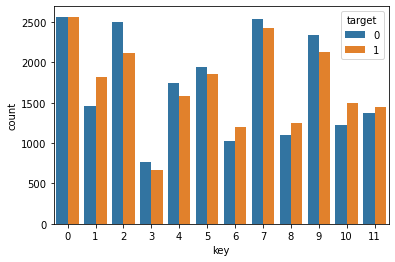

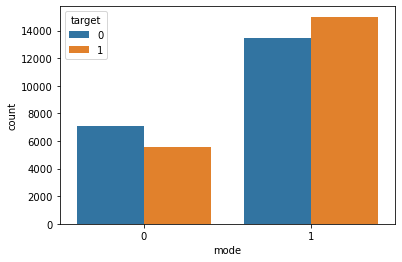

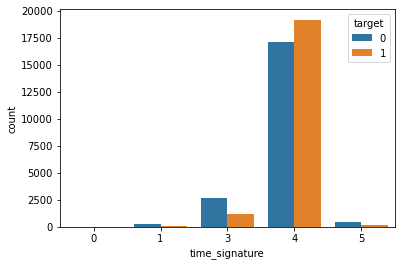

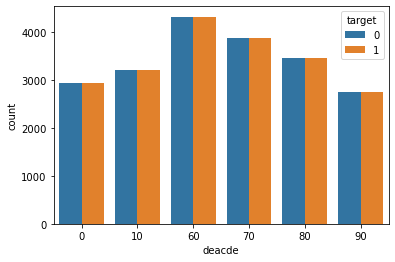

In [19]:
for i in df_cat.columns:
    sns.countplot(df_cat[i],hue = df['target'])
    plt.show()

In [35]:
### Inference
### From the above countplot we can conclude saying  variou keys ,mode and various time_signatures 
### has an impact for a song to be a hit .

In [20]:
df.drop(columns=['track', 'artist','uri'],inplace = True)


In [23]:
df['target']= df['target'].astype('object')

In [24]:
df_num = df.select_dtypes(include = np.number)
df_num.columns

Index(['decade', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'chorus_hit', 'sections'],
      dtype='object')

In [25]:
df_cat = df.select_dtypes(include = 'object')
df_cat.columns

Index(['key', 'mode', 'time_signature', 'target', 'deacde'], dtype='object')

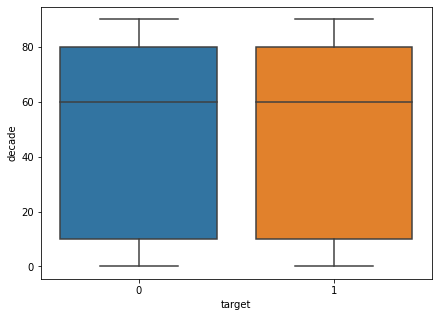

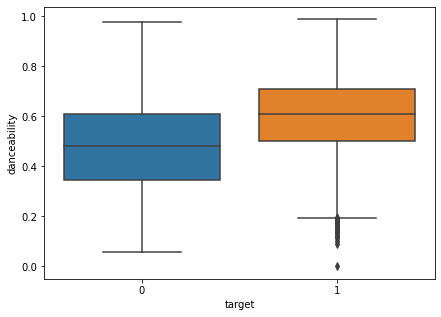

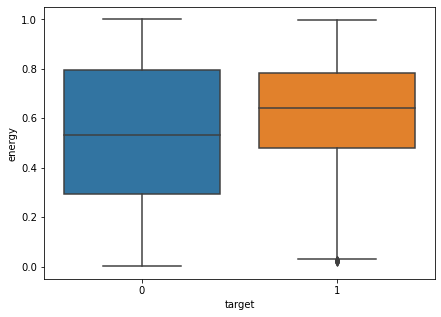

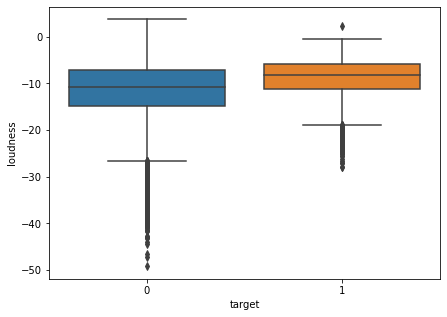

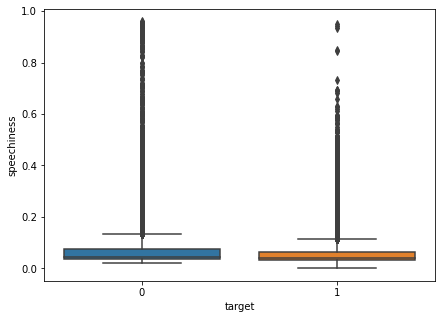

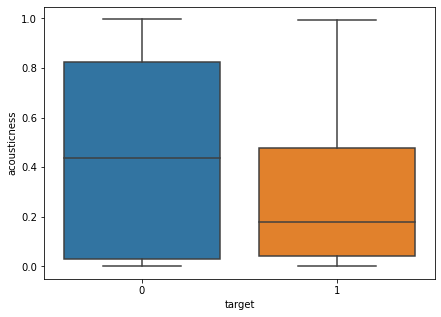

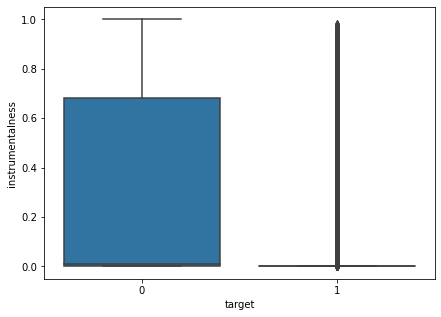

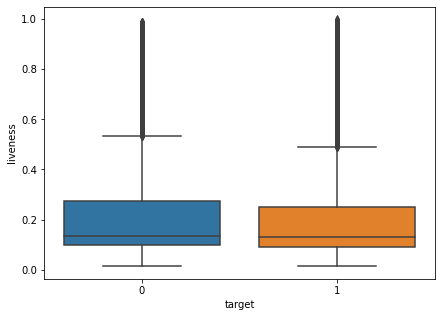

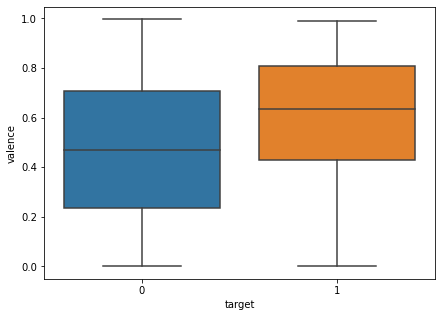

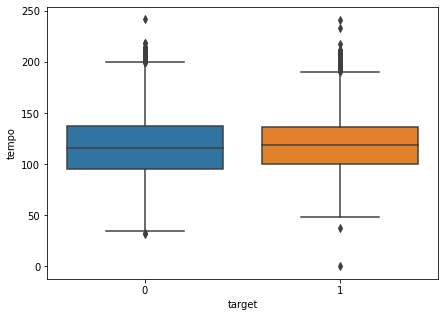

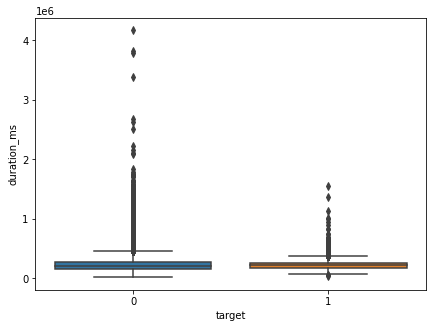

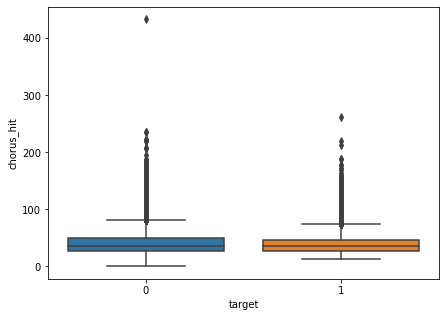

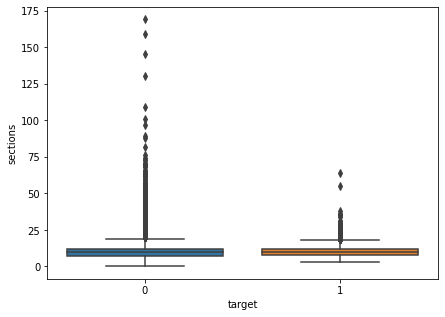

In [34]:
plt.rcParams['figure.figsize'] = [7,5]
for i in df_num.columns:
    sns.boxplot(df_cat['target'],df_num[i])
    plt.show()

In [ ]:
### Inference
### From the above boxplots, we can say dancebility,energy,loudness,acousticness,instrumentalness,valence are significant 
### features impacting a song to be a hit.

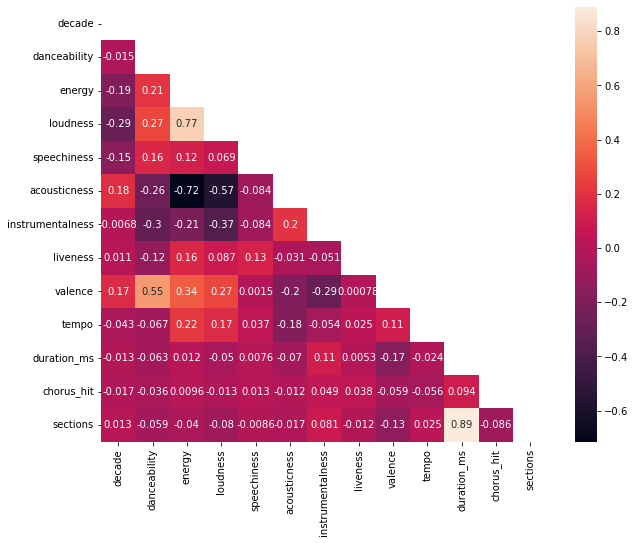

In [31]:
matrix = df_num.corr()
cor = np.triu(matrix)
plt.rcParams['figure.figsize'] = [10,8]
sns.heatmap(matrix,annot=True,mask=cor)
plt.show()

In [32]:
### Inference from the heatmap(with treshold lesser than -0.7 and greater than 0.7 indicates high correlation)
### Energy and acousticness 
### Loudness and energy
### duration_ms and sections seems to be highly correlated

In [40]:
df_cat.head()

key mode time_signature target deacde
0   3    1              3      1     60
1   3    1              4      0     60
2   5    1              4      0     60
3   7    0              4      0     60
4  11    0              4      0     60

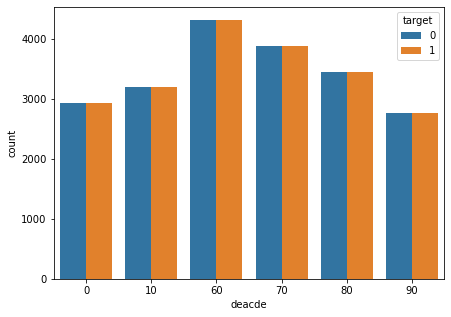

In [43]:
sns.countplot(df_cat['deacde'],hue = df['target'])
plt.show()

In [44]:
#### Inference 
#### The data has been collected such that there was a balance between the number of hits and non hits  for each deacde
#### hence dropping the column as it doesn't have any information .

In [72]:
df_cat.drop(columns = ['deacde'],inplace = True)

([<matplotlib.patches.Wedge at 0x19ca8e83c70>,
 [Text(6.735557395310444e-17, 1.1, '1'),
  Text(-2.0206672185931328e-16, -1.1, '0')],
 [Text(3.6739403974420595e-17, 0.6, '50.00'),
  Text(-1.1021821192326178e-16, -0.6, '50.00')])

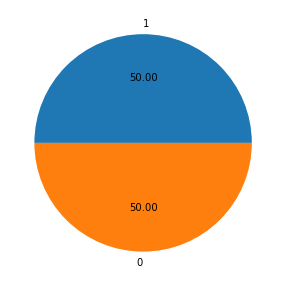

In [64]:
plt.pie(df['target'].value_counts(normalize = True),autopct = '%.2f',labels = list(df.target.unique()))

In [65]:
### ThE data is pretty equally balanced with equal number of hit and not hit songs

The columns is  decade
The skewness is  -0.6457807669611753


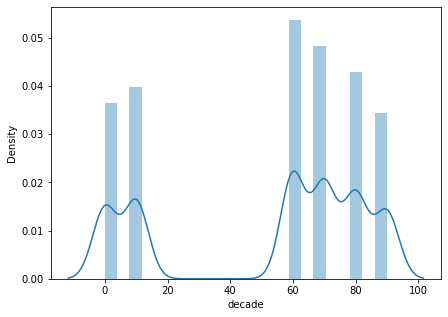

The columns is  danceability
The skewness is  -0.25176239750627916


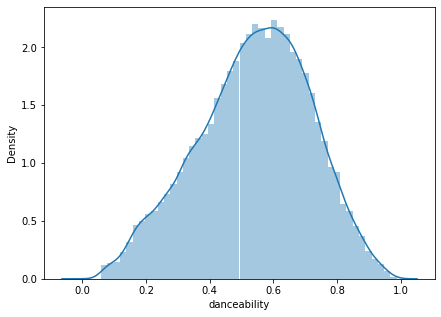

The columns is  energy
The skewness is  -0.32016811835083325


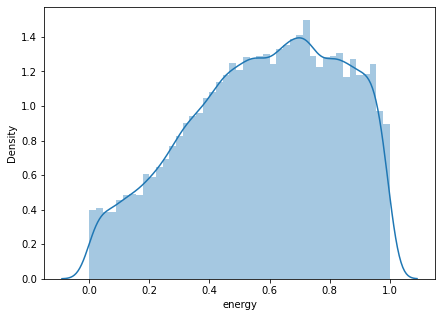

The columns is  loudness
The skewness is  -1.4151087083454397


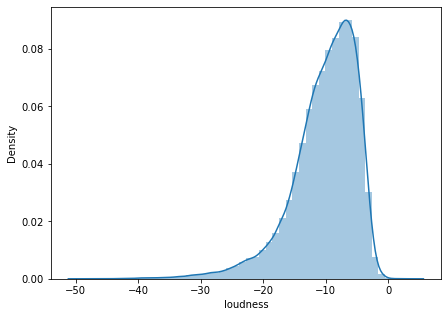

The columns is  speechiness
The skewness is  4.573376124647506


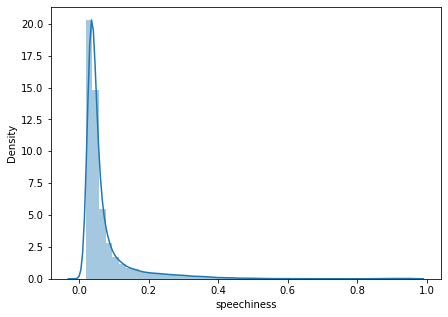

The columns is  acousticness
The skewness is  0.49336048522746084


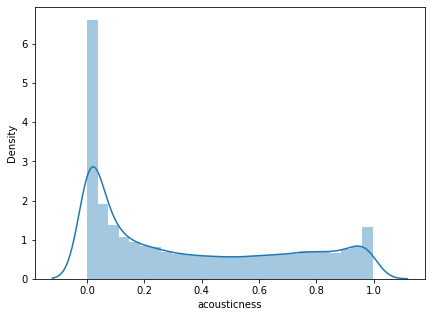

The columns is  instrumentalness
The skewness is  1.7452773449326962


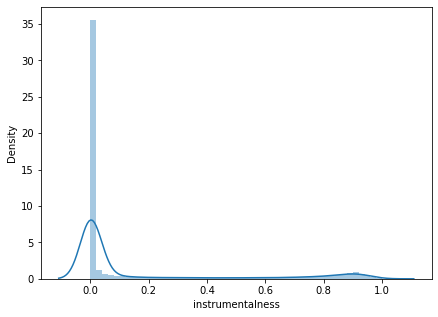

The columns is  liveness
The skewness is  2.1238183304973774


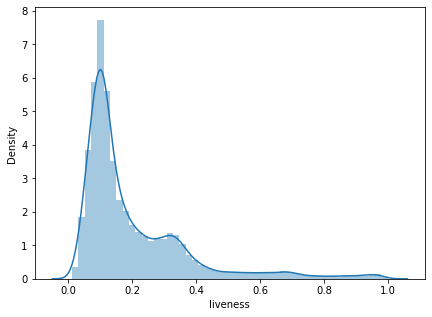

The columns is  valence
The skewness is  -0.17974500585237166


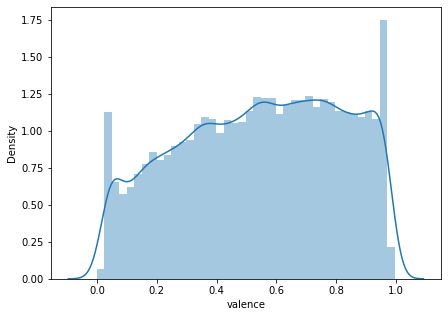

The columns is  tempo
The skewness is  0.48527837233698906


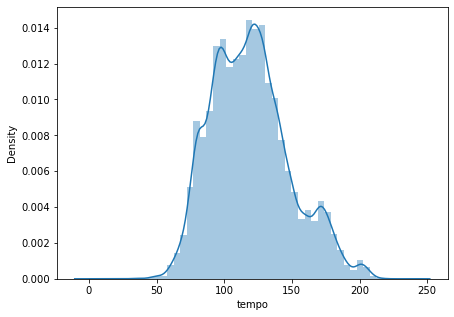

The columns is  duration_ms
The skewness is  6.820674454887252


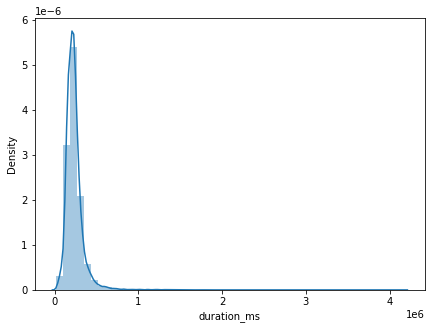

The columns is  chorus_hit
The skewness is  2.2153384528550726


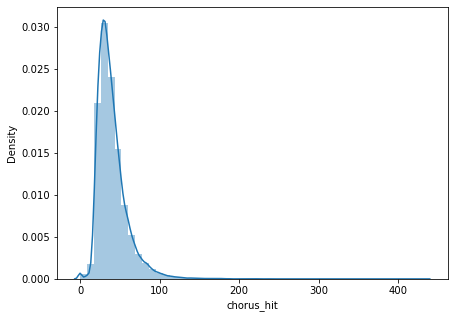

The columns is  sections
The skewness is  6.053588475068239


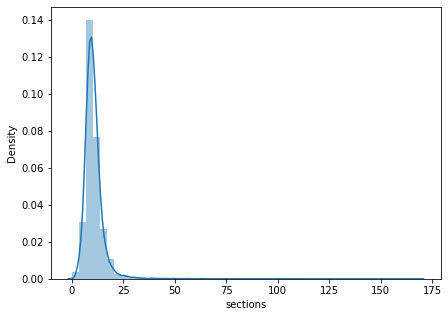

In [69]:
for i in df_num.columns:
    print('The columns is ',i)
    print('The skewness is ',df_num[i].skew())
    sns.distplot(df_num[i])
    plt.show()

In [70]:
df_num.skew()

decade             -0.645781
danceability       -0.251762
energy             -0.320168
loudness           -1.415109
speechiness         4.573376
acousticness        0.493360
instrumentalness    1.745277
liveness            2.123818
valence            -0.179745
tempo               0.485278
duration_ms         6.820674
chorus_hit          2.215338
sections            6.053588
dtype: float64

In [71]:
### Although there is not much skewness in most of the variables , Speechiness,duration_ms,sections are positively skewed

In [77]:
df.dtypes

decade                int64
danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature       object
chorus_hit          float64
sections              int64
target               object
deacde               object
dtype: object

In [78]:
df.columns

Index(['decade', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'deacde'],
      dtype='object')

In [79]:
df_num.columns

Index(['decade', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'chorus_hit', 'sections'],
      dtype='object')

In [80]:
df_cat.columns

Index(['key', 'mode', 'time_signature', 'target'], dtype='object')

## STATISTICAL ANALYSIS

##### CHI_SQUARE TEST

In [82]:
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
## null - hypo is the variables are independent
## alternate - hypo is the variables are independent
## let alpha = 0.05(we are 95 percent confident about our inferences)

In [85]:
df.dtypes

decade               object
danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature       object
chorus_hit          float64
sections              int64
target               object
deacde               object
dtype: object

In [86]:
df_cat.columns

Index(['key', 'mode', 'time_signature', 'target'], dtype='object')

In [87]:
df['mode'] = df['mode'].astype('object')
df['key'] = df['key'].astype('object')
df['time_signature'] = df['time_signature'].astype('object')
df['decade'] = df['decade'].astype('object')

#####  ~Applying CHI_sq Contingency to see if varibles decade and target have some sort of dependence

In [88]:
df_dt = pd.crosstab(df['target'],df['decade'])
df_dt

decade    0     10    60    70    80    90
target                                    
0       2936  3199  4321  3883  3454  2760
1       2936  3199  4321  3883  3454  2760

In [89]:
obs = df_dt.values
obs

array([[2936, 3199, 4321, 3883, 3454, 2760],
       [2936, 3199, 4321, 3883, 3454, 2760]], dtype=int64)

In [90]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 5), 4)) #df = (n-1)(K-1) ie 5*1

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 11.0705


In [91]:
test_stat, p, dof, expected_value = chi2_contingency(observed = obs, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 0.0
p-value: 1.0
Degrees of freedom: 5
Expected values: [[2936. 3199. 4321. 3883. 3454. 2760.]
 [2936. 3199. 4321. 3883. 3454. 2760.]]


#### Inference: The above output shows that the p-value is greater than 0.05, therefor we fail to reject the null hypothesis and conclude that the variables target and decade are  independent.¶

#####  ~Applying CHI_sq Contingency to see if varibles mode and target have some sort of dependence

In [92]:
df_mt = pd.crosstab(df['mode'],df['target'])
df_mt

target      0      1
mode                
0        7057   5548
1       13496  15005

In [93]:
obs = df_mt.values

In [94]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 1), 4)) #df = (n-1)(K-1) ie 1*1

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 3.8415


In [95]:
test_stat, p, dof, expected_value = chi2_contingency(observed = obs, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 260.54380378533523
p-value: 1.3061118514072107e-58
Degrees of freedom: 1
Expected values: [[ 6302.5  6302.5]
 [14250.5 14250.5]]


##### Inference: The above output shows that the p-value is lesser than 0.05,  therefor  reject the null hypothesis and conclude that the variables mode and target are not  independent.

#####  ~Applying CHI_sq Contingency to see if varibles target and key have some sort of dependence

In [96]:
df_kt = pd.crosstab(df['key'],df['target'])
df_kt

target     0     1
key               
0       2565  2565
1       1455  1823
2       2502  2117
3        764   666
4       1739  1584
5       1940  1850
6       1020  1197
7       2534  2428
8       1097  1248
9       2341  2128
10      1229  1499
11      1367  1448

In [97]:
obs = df_kt.values

In [98]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df =10 ), 4)) #df = (n-1)(K-1) ie 1*10

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 18.307


In [99]:
test_stat, p, dof, expected_value = chi2_contingency(observed = obs, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 154.81092142784865
p-value: 1.5470531317534422e-27
Degrees of freedom: 11
Expected values: [[2565.  2565. ]
 [1639.  1639. ]
 [2309.5 2309.5]
 [ 715.   715. ]
 [1661.5 1661.5]
 [1895.  1895. ]
 [1108.5 1108.5]
 [2481.  2481. ]
 [1172.5 1172.5]
 [2234.5 2234.5]
 [1364.  1364. ]
 [1407.5 1407.5]]


##### Inference: The above output shows that the p-value is lesser than 0.05,  therefor  reject the null hypothesis and conclude that the variables target and mode have dependency

#####  ~Applying CHI_sq Contingency to see if varibles target and time_signature have some sort of dependence

In [100]:
df_tt = pd.crosstab(df['time_signature'],df['target'])
df_tt

target              0      1
time_signature              
0                   2      1
1                 300     71
3                2650   1190
4               17140  19157
5                 461    134

In [101]:
obs = df_tt.values

In [102]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df =1 ), 4)) #df = (n-1)(K-1) ie 1*4

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 3.8415


In [103]:
test_stat, p, dof, expected_value = chi2_contingency(observed = obs, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 988.5838495756402
p-value: 1.0631777094833608e-212
Degrees of freedom: 4
Expected values: [[1.50000e+00 1.50000e+00]
 [1.85500e+02 1.85500e+02]
 [1.92000e+03 1.92000e+03]
 [1.81485e+04 1.81485e+04]
 [2.97500e+02 2.97500e+02]]


##### Inference: The above output shows that the p-value is lesser than 0.05,  therefor  reject the null hypothesis and conclude that the variables target and time_signature have dependency

## ANOVA TEST

##### ~Anova test to find top 10  features

In [121]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

danceability  energy  loudness  speechiness  acousticness  \
0         0.417   0.620    -7.727       0.0403         0.490   
1         0.498   0.505   -12.475       0.0337         0.018   
2         0.657   0.649   -13.392       0.0380         0.846   
3         0.590   0.545   -12.058       0.1040         0.706   
4         0.515   0.765    -3.515       0.1240         0.857   

   instrumentalness  liveness  valence    tempo  duration_ms  chorus_hit  \
0          0.000000    0.0779    0.845  185.655       173533    32.94975   
1          0.107000    0.1760    0.797  101.801       213613    48.82510   
2          0.000004    0.1190    0.908  115.940       223960    37.22663   
3          0.024600    0.0610    0.967  105.592       157907    24.75484   
4          0.000872    0.2130    0.906  114.617       245600    21.79874   

   sections  
0         9  
1        10  
2        12  
3         8  
4        14

In [122]:
X = df_num
Y = df_cat['target']

In [123]:
from sklearn.feature_selection import f_classif,SelectKBest
fs = SelectKBest(score_func = f_classif,k=10)
import math

In [124]:
fs.fit(X,Y)

SelectKBest()

In [125]:
fs.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True])

In [126]:
fs.get_support().sum()

10

In [127]:
def list_ceil(X):
    return[math.ceil(i) for i in X]

In [128]:
print('P_values :')
print(np.round(fs.pvalues_,4))
print('F values')
print(fs.scores_)

P_values :
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F values
[5593.56797054 1331.60376304 3662.60307655   68.65685677 2648.49797085
 8191.35483168  109.07426198 2767.15520003   43.86127652  225.21624278
   88.71878833  148.49437199]


In [129]:
list_ceil(fs.scores_),

([5594, 1332, 3663, 69, 2649, 8192, 110, 2768, 44, 226, 89, 149],)

In [130]:
featur_sc = pd.DataFrame(fs.scores_)
feat = pd.DataFrame(X.columns)
FS = pd.concat ([feat,featur_sc],1)
FS.columns = ['Features','F_scores']
FS = pd.DataFrame(FS)
print(FS.nlargest(10,columns='F_scores').reset_index(drop = True))

           Features     F_scores
0  instrumentalness  8191.354832
1      danceability  5593.567971
2          loudness  3662.603077
3           valence  2767.155200
4      acousticness  2648.497971
5            energy  1331.603763
6       duration_ms   225.216243
7          sections   148.494372
8          liveness   109.074262
9        chorus_hit    88.718788


In [ ]:
### The above are the top 10 significant features orders by significance

### SKEWNESS CHECK -

In [135]:
df.skew()

danceability       -0.251762
energy             -0.320168
key                 0.011140
loudness           -1.415109
mode               -0.838691
speechiness         4.573376
acousticness        0.493360
instrumentalness    1.745277
liveness            2.123818
valence            -0.179745
tempo               0.485278
duration_ms         6.820674
time_signature     -3.552714
chorus_hit          2.215338
sections            6.053588
target              0.000000
dtype: float64

In [132]:
df.drop(columns = ['decade','deacde'],inplace = True)

In [134]:
df.dtypes

danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature       object
chorus_hit          float64
sections              int64
target               object
dtype: object

In [137]:
###Encoding The Categorical variables

In [138]:
df = pd.get_dummies(data = df,columns = ['key','mode','time_signature'],drop_first = True)

In [140]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'chorus_hit', 'sections', 'target', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'mode_1', 'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')

In [136]:
### Splitting The data intro train and test

In [173]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'chorus_hit', 'sections', 'target', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'mode_1', 'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')

In [174]:
x = df.drop(columns = ['target'])
y = df.target

In [196]:
y = y.astype('int')

In [197]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30,random_state = 123,stratify = y)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((28774, 28), (12332, 28), (28774,), (12332,))

In [200]:
xtrain.head()

danceability  energy  loudness  speechiness  acousticness  \
385           0.804  0.3640   -10.681       0.0620      0.625000   
22199         0.328  0.1550   -18.533       0.0415      0.871000   
13206         0.789  0.5160    -8.269       0.0916      0.401000   
26508         0.537  0.0659   -23.493       0.0492      0.660000   
31557         0.594  0.7360    -8.486       0.0388      0.000256   

       instrumentalness  liveness  valence    tempo  duration_ms  ...  key_7  \
385            0.899000     0.166   0.5560  135.008       141013  ...      0   
22199          0.938000     0.129   0.2110   65.112        73797  ...      0   
13206          0.000023     0.070   0.8120  109.328       336427  ...      0   
26508          0.000003     0.468   0.5280  105.199       203407  ...      0   
31557          0.072200     0.107   0.0398  129.998       361347  ...      0   

       key_8  key_9  key_10  key_11  mode_1  time_signature_1  \
385        0      0       1       0       1                 0   
22199      0      0       0       0       1                 0   
13206      0      1       0       0       0                 0   
26508      0      0       0       0       1                 0   
31557      0      0       0       1       1                 0   

       time_signature_3  time_signature_4  time_signature_5  
385                   0                 1                 0  
22199                 0                 1                 0  
13206                 0                 1                 0  
26508                 0                 1                 0  
31557                 0                 1                 0  

[5 rows x 28 columns]

In [201]:
xtest.head()

danceability  energy  loudness  speechiness  acousticness  \
13372         0.370   0.418   -11.305       0.0266      0.303000   
1505          0.715   0.544    -8.768       0.0574      0.001970   
11040         0.799   0.583   -17.629       0.0437      0.554000   
39541         0.651   0.773    -6.970       0.0366      0.318000   
40000         0.602   0.905    -4.046       0.0775      0.000202   

       instrumentalness  liveness  valence    tempo  duration_ms  ...  key_7  \
13372            0.0000    0.0832    0.926  177.576       207986  ...      0   
1505             0.0544    0.1100    0.670  167.784       397200  ...      1   
11040            0.2100    0.0792    0.909  132.249       354653  ...      0   
39541            0.0000    0.2700    0.690   83.995       194573  ...      1   
40000            0.0640    0.1170    0.411  128.019       304840  ...      0   

       key_8  key_9  key_10  key_11  mode_1  time_signature_1  \
13372      0      0       0       0       1                 0   
1505       0      0       0       0       1                 0   
11040      0      0       0       0       1                 0   
39541      0      0       0       0       1                 0   
40000      0      0       0       0       1                 0   

       time_signature_3  time_signature_4  time_signature_5  
13372                 0                 1                 0  
1505                  0                 1                 0  
11040                 0                 1                 0  
39541                 0                 1                 0  
40000                 0                 1                 0  

[5 rows x 28 columns]

In [202]:
xtrain.skew()

danceability        -0.244815
energy              -0.316541
loudness            -1.394167
speechiness          4.607352
acousticness         0.492607
instrumentalness     1.746110
liveness             2.119163
valence             -0.172582
tempo                0.494236
duration_ms          6.722062
chorus_hit           2.318920
sections             6.010945
key_1                3.111243
key_2                2.471710
key_3                5.038649
key_4                3.080791
key_5                2.810675
key_6                3.940484
key_7                2.323693
key_8                3.835928
key_9                2.506212
key_10               3.497437
key_11               3.416641
mode_1              -0.832235
time_signature_1    10.276256
time_signature_3     2.802141
time_signature_4    -2.376280
time_signature_5     7.938348
dtype: float64

In [203]:
xtest.skew()

danceability        -0.268300
energy              -0.328583
loudness            -1.461389
speechiness          4.478886
acousticness         0.495169
instrumentalness     1.743542
liveness             2.134711
valence             -0.196489
tempo                0.464687
duration_ms          7.067347
chorus_hit           1.956270
sections             6.153746
key_1                3.083637
key_2                2.416646
key_3                5.172716
key_4                3.063647
key_5                2.839740
key_6                3.971586
key_7                2.340016
key_8                3.783197
key_9                2.532841
key_10               3.454402
key_11               3.418726
mode_1              -0.853947
time_signature_1    10.647811
time_signature_3     2.776619
time_signature_4    -2.400474
time_signature_5     8.636606
dtype: float64

##### Treating skewness using powertransformation

In [204]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [205]:
xt = pt.fit_transform(xtrain)

In [206]:
Xtrain = pd.DataFrame(data = xt,columns = xtrain.columns)

In [207]:
Xtrain.head()

danceability    energy  loudness  speechiness  acousticness  \
0      1.551875 -0.888816 -0.286315     0.405644      0.905489   
1     -1.183978 -1.591485 -1.469717    -0.400651      1.348711   
2      1.455842 -0.318852  0.221989     1.123384      0.360902   
3     -0.062885 -1.861886 -2.014881    -0.058812      0.976861   
4      0.264860  0.591814  0.171783    -0.533532     -1.250525   

   instrumentalness  liveness   valence     tempo  duration_ms  ...     key_7  \
0          1.929534  0.139023  0.024204  0.612526          0.0  ... -0.371102   
1          1.932275 -0.271575 -1.228314 -2.260074          0.0  ... -0.371102   
2         -0.609389 -1.152571  1.018259 -0.258635          0.0  ... -0.371102   
3         -0.609773  1.602707 -0.081333 -0.414003          0.0  ... -0.371102   
4          0.446656 -0.562969 -1.807897  0.453907          0.0  ... -0.371102   

      key_8     key_9    key_10    key_11    mode_1  time_signature_1  \
0 -0.245051 -0.350116  3.763000 -0.271176  0.667018         -0.096412   
1 -0.245051 -0.350116 -0.265745 -0.271176  0.667018         -0.096412   
2 -0.245051  2.856197 -0.265745 -0.271176 -1.499210         -0.096412   
3 -0.245051 -0.350116 -0.265745 -0.271176  0.667018         -0.096412   
4 -0.245051 -0.350116 -0.265745  3.687639  0.667018         -0.096412   

   time_signature_3  time_signature_4  time_signature_5  
0         -0.320279          0.364832         -0.124039  
1         -0.320279          0.364832         -0.124039  
2         -0.320279          0.364832         -0.124039  
3         -0.320279          0.364832         -0.124039  
4         -0.320279          0.364832         -0.124039  

[5 rows x 28 columns]

In [208]:
xtt = pt.transform(xtest)
Xtest = pd.DataFrame(data = xtt,columns = xtest.columns)

In [209]:
Xtest.head()

danceability    energy  loudness  speechiness  acousticness  \
0     -0.968975 -0.691944 -0.402706    -1.232805      0.061441   
1      0.991269 -0.208539  0.108021     0.252065     -1.240779   
2      1.519794 -0.052155 -1.357474    -0.297566      0.750464   
3      0.601884  0.754774  0.546064    -0.647257      0.110268   
4      0.311603  1.358822  1.491026     0.832227     -1.250833   

   instrumentalness  liveness   valence     tempo  duration_ms  ...     key_7  \
0         -0.609831 -0.926286  1.476988  1.795256          0.0  ... -0.371102   
1          0.241722 -0.520877  0.460502  1.545634          0.0  ...  2.694674   
2          1.352304 -0.992863  1.407980  0.525782          0.0  ... -0.371102   
3         -0.609831  0.916973  0.538116 -1.300685          0.0  ...  2.694674   
4          0.355921 -0.425638 -0.515134  0.389871          0.0  ... -0.371102   

      key_8     key_9    key_10    key_11    mode_1  time_signature_1  \
0 -0.245051 -0.350116 -0.265745 -0.271176  0.667018         -0.096412   
1 -0.245051 -0.350116 -0.265745 -0.271176  0.667018         -0.096412   
2 -0.245051 -0.350116 -0.265745 -0.271176  0.667018         -0.096412   
3 -0.245051 -0.350116 -0.265745 -0.271176  0.667018         -0.096412   
4 -0.245051 -0.350116 -0.265745 -0.271176  0.667018         -0.096412   

   time_signature_3  time_signature_4  time_signature_5  
0         -0.320279          0.364832         -0.124039  
1         -0.320279          0.364832         -0.124039  
2         -0.320279          0.364832         -0.124039  
3         -0.320279          0.364832         -0.124039  
4         -0.320279          0.364832         -0.124039  

[5 rows x 28 columns]

#### ~Scaling the transformed data

In [210]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [211]:
xtrain_s = pd.DataFrame(SS.fit_transform(Xtrain),columns = Xtrain.columns)
xtrain_s.head()

danceability    energy  loudness  speechiness  acousticness  \
0      1.551875 -0.888816 -0.286315     0.405644      0.905489   
1     -1.183978 -1.591485 -1.469717    -0.400651      1.348711   
2      1.455842 -0.318852  0.221989     1.123384      0.360902   
3     -0.062885 -1.861886 -2.014881    -0.058812      0.976861   
4      0.264860  0.591814  0.171783    -0.533532     -1.250525   

   instrumentalness  liveness   valence     tempo  duration_ms  ...     key_7  \
0          1.929534  0.139023  0.024204  0.612526          0.0  ... -0.371102   
1          1.932275 -0.271575 -1.228314 -2.260074          0.0  ... -0.371102   
2         -0.609389 -1.152571  1.018259 -0.258635          0.0  ... -0.371102   
3         -0.609773  1.602707 -0.081333 -0.414003          0.0  ... -0.371102   
4          0.446656 -0.562969 -1.807897  0.453907          0.0  ... -0.371102   

      key_8     key_9    key_10    key_11    mode_1  time_signature_1  \
0 -0.245051 -0.350116  3.763000 -0.271176  0.667018         -0.096412   
1 -0.245051 -0.350116 -0.265745 -0.271176  0.667018         -0.096412   
2 -0.245051  2.856197 -0.265745 -0.271176 -1.499210         -0.096412   
3 -0.245051 -0.350116 -0.265745 -0.271176  0.667018         -0.096412   
4 -0.245051 -0.350116 -0.265745  3.687639  0.667018         -0.096412   

   time_signature_3  time_signature_4  time_signature_5  
0         -0.320279          0.364832         -0.124039  
1         -0.320279          0.364832         -0.124039  
2         -0.320279          0.364832         -0.124039  
3         -0.320279          0.364832         -0.124039  
4         -0.320279          0.364832         -0.124039  

[5 rows x 28 columns]

In [212]:
xtrain_s.head()

danceability    energy  loudness  speechiness  acousticness  \
0      1.551875 -0.888816 -0.286315     0.405644      0.905489   
1     -1.183978 -1.591485 -1.469717    -0.400651      1.348711   
2      1.455842 -0.318852  0.221989     1.123384      0.360902   
3     -0.062885 -1.861886 -2.014881    -0.058812      0.976861   
4      0.264860  0.591814  0.171783    -0.533532     -1.250525   

   instrumentalness  liveness   valence     tempo  duration_ms  ...     key_7  \
0          1.929534  0.139023  0.024204  0.612526          0.0  ... -0.371102   
1          1.932275 -0.271575 -1.228314 -2.260074          0.0  ... -0.371102   
2         -0.609389 -1.152571  1.018259 -0.258635          0.0  ... -0.371102   
3         -0.609773  1.602707 -0.081333 -0.414003          0.0  ... -0.371102   
4          0.446656 -0.562969 -1.807897  0.453907          0.0  ... -0.371102   

      key_8     key_9    key_10    key_11    mode_1  time_signature_1  \
0 -0.245051 -0.350116  3.763000 -0.271176  0.667018         -0.096412   
1 -0.245051 -0.350116 -0.265745 -0.271176  0.667018         -0.096412   
2 -0.245051  2.856197 -0.265745 -0.271176 -1.499210         -0.096412   
3 -0.245051 -0.350116 -0.265745 -0.271176  0.667018         -0.096412   
4 -0.245051 -0.350116 -0.265745  3.687639  0.667018         -0.096412   

   time_signature_3  time_signature_4  time_signature_5  
0         -0.320279          0.364832         -0.124039  
1         -0.320279          0.364832         -0.124039  
2         -0.320279          0.364832         -0.124039  
3         -0.320279          0.364832         -0.124039  
4         -0.320279          0.364832         -0.124039  

[5 rows x 28 columns]

In [213]:
xtrain_s.describe()

danceability        energy      loudness   speechiness  acousticness  \
count  2.877400e+04  2.877400e+04  2.877400e+04  2.877400e+04  2.877400e+04   
mean  -1.936350e-17 -1.234696e-17 -1.257075e-17  6.924328e-17 -1.439192e-18   
std    1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min   -2.435853e+00 -2.049743e+00 -3.851097e+00 -1.544709e+00 -1.251984e+00   
25%   -7.062310e-01 -7.729020e-01 -6.715185e-01 -8.050697e-01 -1.036236e+00   
50%    2.245979e-02  2.109118e-02 -2.236571e-03 -3.021537e-01 -8.874470e-02   
75%    7.162757e-01  8.171634e-01  7.048351e-01  6.554261e-01  1.010414e+00   
max    2.780439e+00  1.815283e+00  1.175599e+01  2.112185e+00  1.530703e+00   

       instrumentalness      liveness       valence         tempo  \
count      2.877400e+04  2.877400e+04  2.877400e+04  2.877400e+04   
mean      -2.650545e-16 -5.022511e-17 -5.518174e-17 -1.510959e-17   
std        1.000017e+00  1.000017e+00  1.000017e+00  1.000017e+00   
min       -6.098308e-01 -2.386612e+00 -1.938225e+00 -4.659475e+00   
25%       -6.098308e-01 -7.531662e-01 -8.155880e-01 -7.228908e-01   
50%       -6.074668e-01 -2.347843e-01  2.420370e-02  3.622090e-02   
75%        3.208963e-01  8.717907e-01  8.358868e-01  6.569086e-01   
max        1.935763e+00  2.030816e+00  1.750972e+00  3.192216e+00   

       duration_ms  ...         key_7         key_8         key_9  \
count      28774.0  ...  2.877400e+04  2.877400e+04  2.877400e+04   
mean           0.0  ... -5.112682e-16  5.093120e-18  1.664100e-16   
std            0.0  ...  1.000017e+00  1.000017e+00  1.000017e+00   
min            0.0  ... -3.711024e-01 -2.450512e-01 -3.501159e-01   
25%            0.0  ... -3.711024e-01 -2.450512e-01 -3.501159e-01   
50%            0.0  ... -3.711024e-01 -2.450512e-01 -3.501159e-01   
75%            0.0  ... -3.711024e-01 -2.450512e-01 -3.501159e-01   
max            0.0  ...  2.694674e+00  4.080779e+00  2.856197e+00   

             key_10        key_11        mode_1  time_signature_1  \
count  2.877400e+04  2.877400e+04  2.877400e+04      2.877400e+04   
mean   4.615617e-15 -5.907711e-16 -1.751647e-16      5.545318e-16   
std    1.000017e+00  1.000017e+00  1.000017e+00      1.000017e+00   
min   -2.657454e-01 -2.711762e-01 -1.499210e+00     -9.641219e-02   
25%   -2.657454e-01 -2.711762e-01 -1.499210e+00     -9.641219e-02   
50%   -2.657454e-01 -2.711762e-01  6.670181e-01     -9.641219e-02   
75%   -2.657454e-01 -2.711762e-01  6.670181e-01     -9.641219e-02   
max    3.763000e+00  3.687639e+00  6.670181e-01      1.037213e+01   

       time_signature_3  time_signature_4  time_signature_5  
count      2.877400e+04      2.877400e+04      2.877400e+04  
mean       2.821430e-15     -2.794653e-15     -1.533906e-15  
std        1.000017e+00      1.000017e+00      1.000017e+00  
min       -3.202793e-01     -2.740988e+00     -1.240391e-01  
25%       -3.202793e-01      3.648319e-01     -1.240391e-01  
50%       -3.202793e-01      3.648319e-01     -1.240391e-01  
75%       -3.202793e-01      3.648319e-01     -1.240391e-01  
max        3.122275e+00      3.648319e-01      8.061973e+00  

[8 rows x 28 columns]

In [214]:
xtest_s = pd.DataFrame(SS.fit_transform(Xtest),columns = Xtest.columns)
xtest_s.describe()

danceability        energy      loudness   speechiness  acousticness  \
count  1.233200e+04  1.233200e+04  1.233200e+04  1.233200e+04  1.233200e+04   
mean  -4.276321e-17  3.993634e-17 -1.107342e-17  1.132888e-17  1.267592e-17   
std    1.000041e+00  1.000041e+00  1.000041e+00  1.000041e+00  1.000041e+00   
min   -2.687590e+00 -2.044339e+00 -3.687921e+00 -3.518732e+00 -1.252650e+00   
25%   -7.034924e-01 -7.758733e-01 -6.445658e-01 -7.917166e-01 -1.037032e+00   
50%    2.917089e-02  1.886160e-02  1.495015e-03 -3.098556e-01 -9.648862e-02   
75%    7.146140e-01  8.164812e-01  7.016267e-01  6.196085e-01  1.003893e+00   
max    2.718781e+00  1.806500e+00  1.948002e+01  2.137837e+00  1.530055e+00   

       instrumentalness      liveness       valence         tempo  \
count      1.233200e+04  1.233200e+04  1.233200e+04  1.233200e+04   
mean      -1.046033e-16  2.913300e-17 -5.527708e-18  3.421057e-18   
std        1.000041e+00  1.000041e+00  1.000041e+00  1.000041e+00   
min       -6.086093e-01 -2.360973e+00 -1.945633e+00 -1.314171e+01   
25%       -6.086093e-01 -7.460179e-01 -8.076798e-01 -7.072398e-01   
50%       -6.063215e-01 -2.224806e-01  4.029616e-02  4.099671e-02   
75%        3.281766e-01  8.618918e-01  8.371281e-01  6.574363e-01   
max        1.939094e+00  2.046992e+00  1.750350e+00  3.141107e+00   

       duration_ms  ...         key_7         key_8         key_9  \
count      12332.0  ...  1.233200e+04  1.233200e+04  1.233200e+04   
mean           0.0  ...  6.244599e-16  3.796293e-16  6.456795e-16   
std            0.0  ...  1.000041e+00  1.000041e+00  1.000041e+00   
min            0.0  ... -3.691554e-01 -2.480882e-01 -3.472485e-01   
25%            0.0  ... -3.691554e-01 -2.480882e-01 -3.472485e-01   
50%            0.0  ... -3.691554e-01 -2.480882e-01 -3.472485e-01   
75%            0.0  ... -3.691554e-01 -2.480882e-01 -3.472485e-01   
max            0.0  ...  2.708887e+00  4.030825e+00  2.879782e+00   

             key_10        key_11        mode_1  time_signature_1  \
count  1.233200e+04  1.233200e+04  1.233200e+04      1.233200e+04   
mean   5.812556e-16 -9.159880e-16 -3.468232e-16      7.248657e-16   
std    1.000041e+00  1.000041e+00  1.000041e+00      1.000041e+00   
min   -2.686287e-01 -2.710497e-01 -1.514240e+00     -9.311309e-02   
25%   -2.686287e-01 -2.710497e-01 -1.514240e+00     -9.311309e-02   
50%   -2.686287e-01 -2.710497e-01  6.603971e-01     -9.311309e-02   
75%   -2.686287e-01 -2.710497e-01  6.603971e-01     -9.311309e-02   
max    3.722611e+00  3.689360e+00  6.603971e-01      1.073963e+01   

       time_signature_3  time_signature_4  time_signature_5  
count      1.233200e+04      1.233200e+04      1.233200e+04  
mean      -6.706082e-16     -8.013556e-16     -1.082447e-15  
std        1.000041e+00      1.000041e+00      1.000041e+00  
min       -3.226879e-01     -2.762211e+00     -1.142878e-01  
25%       -3.226879e-01      3.620288e-01     -1.142878e-01  
50%       -3.226879e-01      3.620288e-01     -1.142878e-01  
75%       -3.226879e-01      3.620288e-01     -1.142878e-01  
max        3.098969e+00      3.620288e-01      8.749843e+00  

[8 rows x 28 columns]

In [215]:
## We have transformed the train and test data seperately as test data has to be completely unseen for the trained model 

In [299]:
def plot_metrics(xtest,ytest,model):
    ypred = model.predict(xtest)
    print('Classification Report ')
    print(classification_report(ytest,ypred))
    print('    Consision Matrix    ')
    cm = confusion_matrix(ytest, ypred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    print('ROC CURVE')
    fpr, tpr, thresholds = roc_curve(ytest, ypred)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for SPOTIFY HIT PREDICTION', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(ytest, ypred),4)))
    plt.grid(True)
    plt.show()
    print()
    print('Cohen Kappa Score is ',cohen_kappa_score(ytest,ypred))
   
    

In [300]:
LR = LogisticRegression()

In [301]:
logreg = LR.fit(xtrain_s,ytrain)

In [302]:
ypred_prob = logreg.predict(xtest)
ypred = [0 if i< 0.5 else 1 for i in ypred_prob]
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.06      0.11      6166
           1       0.51      1.00      0.68      6166

    accuracy                           0.53     12332
   macro avg       0.75      0.53      0.39     12332
weighted avg       0.75      0.53      0.39     12332



In [303]:
print(confusion_matrix(ytest,ypred))

[[ 354 5812]
 [   8 6158]]


<AxesSubplot:>

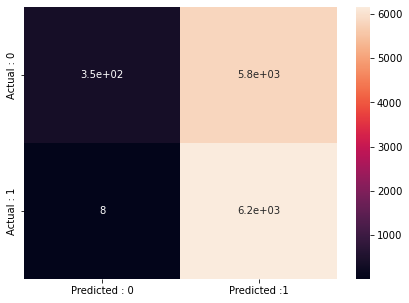

In [304]:
cm = confusion_matrix(ytest,ypred)
conf_mat = pd.DataFrame(cm,columns = ['Predicted : 0','Predicted :1'],index = ['Actual : 0','Actual : 1'])
sns.heatmap(conf_mat,annot = True)

In [305]:
## Creating a score card to evaluate all the model performances
score_card = pd.DataFrame(columns = ['Model name','Accuracy','F1-Score','Cohen-Kappa'])
score_card


Empty DataFrame
Columns: [Model name, Accuracy, F1-Score, Cohen-Kappa]
Index: []

In [306]:
s = pd.Series({'Model name': 'Logistic Regression - Base Model','Accuracy': np.round(accuracy_score(ytest,ypred),2),'F1-Score': np.round(f1_score(ytest,ypred),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

Model name  Accuracy  F1-Score  Cohen-Kappa
0  Logistic Regression - Base Model      0.53      0.68         0.06

Classification Report 
              precision    recall  f1-score   support

           0       0.67      0.70      0.68      6166
           1       0.69      0.66      0.67      6166

    accuracy                           0.68     12332
   macro avg       0.68      0.68      0.68     12332
weighted avg       0.68      0.68      0.68     12332

    Consision Matrix    


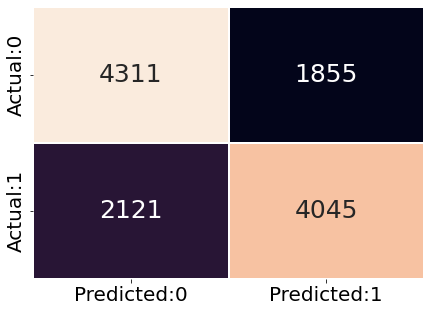

ROC CURVE


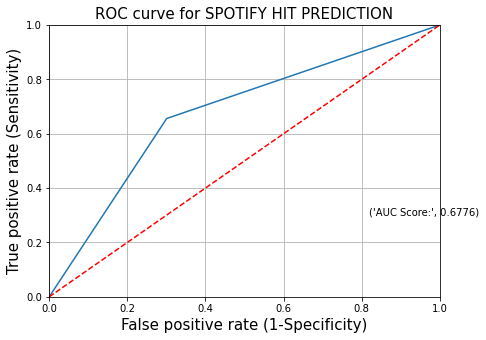


Cohen Kappa Score is  0.35517353227375936


In [307]:
DC = DecisionTreeClassifier(random_state = 1)
DC_mod = DC.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,DC_mod)

In [308]:
ypred_dc = DC_mod.predict(xtest_s)

In [309]:
s = pd.Series({'Model name': 'Decision Tree without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_dc),2),'F1-Score': np.round(f1_score(ytest,ypred_dc),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_dc),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

Model name  Accuracy  F1-Score  Cohen-Kappa
0  Logistic Regression - Base Model      0.53      0.68         0.06
1     Decision Tree without tuning       0.68      0.67         0.36

Classification Report 
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      6166
           1       0.76      0.82      0.79      6166

    accuracy                           0.78     12332
   macro avg       0.78      0.78      0.78     12332
weighted avg       0.78      0.78      0.78     12332

    Consision Matrix    


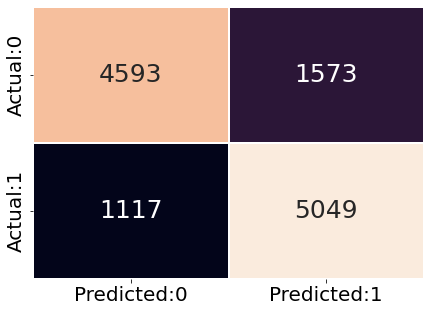

ROC CURVE


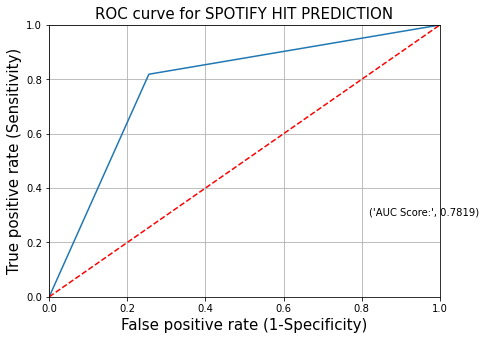


Cohen Kappa Score is  0.5637366201751541


In [310]:
RF = RandomForestClassifier()
RF_mod = RF.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,RF_mod)

In [311]:
ypred_rf = RF_mod.predict(xtest_s)
s = pd.Series({'Model name': 'Random Forest  without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_rf),2),'F1-Score': np.round(f1_score(ytest,ypred_rf),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_rf),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

Model name  Accuracy  F1-Score  Cohen-Kappa
0  Logistic Regression - Base Model      0.53      0.68         0.06
1     Decision Tree without tuning       0.68      0.67         0.36
2    Random Forest  without tuning       0.78      0.79         0.56

Classification Report 
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      6166
           1       0.73      0.77      0.75      6166

    accuracy                           0.75     12332
   macro avg       0.75      0.75      0.74     12332
weighted avg       0.75      0.75      0.74     12332

    Consision Matrix    


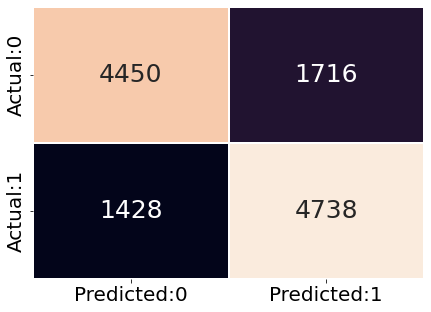

ROC CURVE


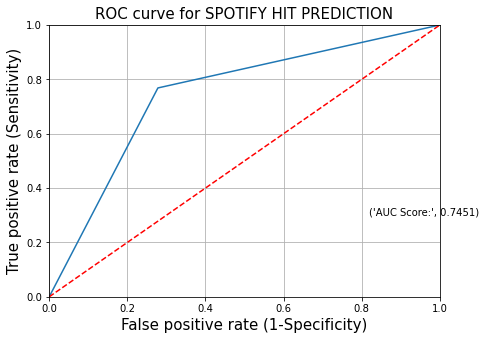


Cohen Kappa Score is  0.4901070385987675


In [312]:
AD = AdaBoostClassifier()
AD_mod = AD.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,AD_mod)

In [313]:
ypred_ad = AD_mod.predict(xtest_s)
s = pd.Series({'Model name': 'ADA Boost  without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_ad),2),'F1-Score': np.round(f1_score(ytest,ypred_ad),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_ad),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

Model name  Accuracy  F1-Score  Cohen-Kappa
0  Logistic Regression - Base Model      0.53      0.68         0.06
1     Decision Tree without tuning       0.68      0.67         0.36
2    Random Forest  without tuning       0.78      0.79         0.56
3        ADA Boost  without tuning       0.75      0.75         0.49

Classification Report 
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      6166
           1       0.75      0.83      0.79      6166

    accuracy                           0.77     12332
   macro avg       0.78      0.77      0.77     12332
weighted avg       0.78      0.77      0.77     12332

    Consision Matrix    


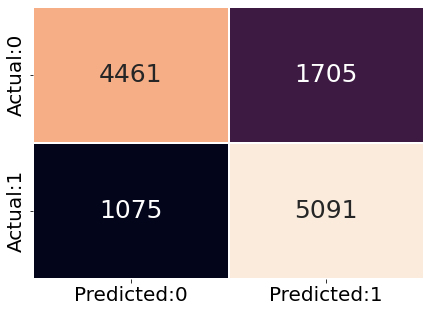

ROC CURVE


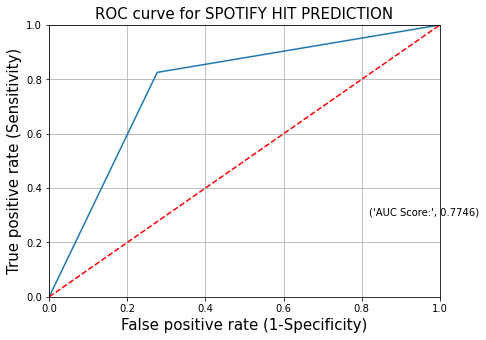


Cohen Kappa Score is  0.5491404476159585


In [314]:
GB = GradientBoostingClassifier()
GB_mod = GB.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,GB_mod)


In [315]:
ypred_gb = GB_mod.predict(xtest_s)
s = pd.Series({'Model name': 'Gradient  Boost  without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_gb),2),'F1-Score': np.round(f1_score(ytest,ypred_gb),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_gb),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

Model name  Accuracy  F1-Score  Cohen-Kappa
0  Logistic Regression - Base Model      0.53      0.68         0.06
1     Decision Tree without tuning       0.68      0.67         0.36
2    Random Forest  without tuning       0.78      0.79         0.56
3        ADA Boost  without tuning       0.75      0.75         0.49
4  Gradient  Boost  without tuning       0.77      0.79         0.55

[23:00:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report 
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      6166
           1       0.76      0.82      0.78      6166

    accuracy                           0.78     12332
   macro avg       0.78      0.78      0.78     12332
weighted avg       0.78      0.78      0.78     12332

    Consision Matrix    


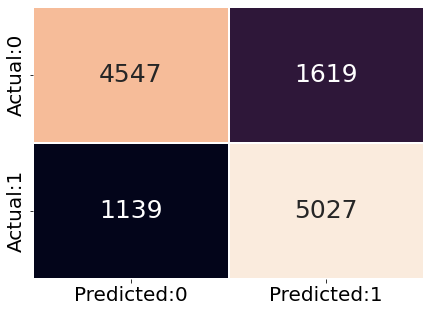

ROC CURVE


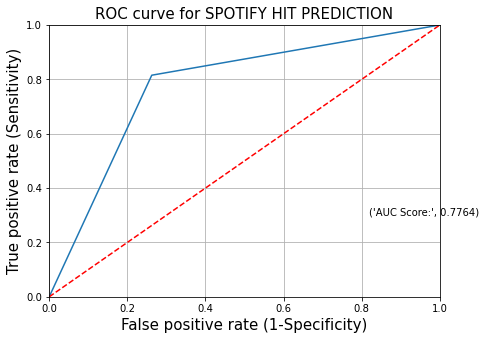


Cohen Kappa Score is  0.5527084009082063


In [317]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
XG_mod = xgb_cl.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,XG_mod)


In [318]:
ypred_xg = XG_mod.predict(xtest_s)
s = pd.Series({'Model name': 'Extreme Gradient Boost  without tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_xg),2),'F1-Score': np.round(f1_score(ytest,ypred_xg),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_xg),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

Model name  Accuracy  F1-Score  Cohen-Kappa
0         Logistic Regression - Base Model      0.53      0.68         0.06
1            Decision Tree without tuning       0.68      0.67         0.36
2           Random Forest  without tuning       0.78      0.79         0.56
3               ADA Boost  without tuning       0.75      0.75         0.49
4         Gradient  Boost  without tuning       0.77      0.79         0.55
5  Extreme Gradient Boost  without tuning       0.78      0.78         0.55

In [320]:
## The Highest metrics we got is from random forets, thereby to increase the accuracy even further ,lets hypertune
## the random forest with the best parameters and built the model

In [319]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': [10,12,15,20],
                     'max_leaf_nodes': [10,12,15],
                    'min_samples_split':[2,3,4]}]

rf = RandomForestClassifier(random_state = 123)

grid_model_rf = GridSearchCV(estimator = rf , param_grid = tuned_paramaters,cv = 5)

model6 = grid_model_rf.fit(xtrain_s,ytrain)

print(' Best parameters: ',grid_model_rf.best_params_,'\n')

 Best parameters:  {'criterion': 'gini', 'max_depth': 12, 'max_leaf_nodes': 15, 'min_samples_split': 2} 



Classification Report 
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      6166
           1       0.72      0.83      0.77      6166

    accuracy                           0.76     12332
   macro avg       0.76      0.76      0.75     12332
weighted avg       0.76      0.76      0.75     12332

    Consision Matrix    


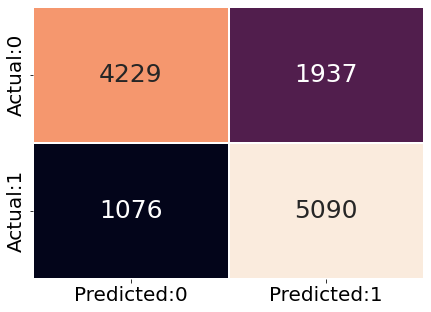

ROC CURVE


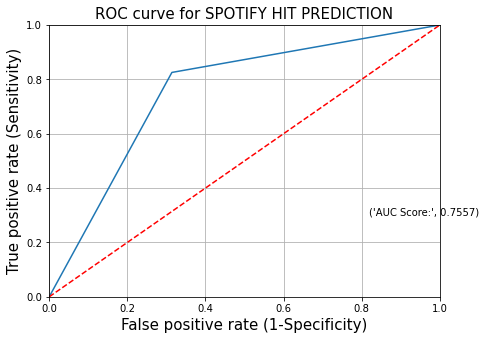


Cohen Kappa Score is  0.5113525786571521


In [321]:
RF_tuned = RandomForestClassifier(criterion = 'gini',max_depth = 12,max_leaf_nodes = 15,min_samples_split = 2)
RF_mod_tuned = RF_tuned.fit(xtrain_s,ytrain)
plot_metrics(xtest_s,ytest,RF_mod_tuned)

In [323]:
ypred_rft = RF_mod_tuned.predict(xtest_s)
s = pd.Series({'Model name': ' Random Forest  with tuning ','Accuracy': np.round(accuracy_score(ytest,ypred_rft),2),'F1-Score': np.round(f1_score(ytest,ypred_rft),2),'Cohen-Kappa': np.round(cohen_kappa_score(ytest,ypred_rft),2)})
score_card = score_card.append(s,ignore_index=True)
score_card

Model name  Accuracy  F1-Score  Cohen-Kappa
0         Logistic Regression - Base Model      0.53      0.68         0.06
1            Decision Tree without tuning       0.68      0.67         0.36
2           Random Forest  without tuning       0.78      0.79         0.56
3               ADA Boost  without tuning       0.75      0.75         0.49
4         Gradient  Boost  without tuning       0.77      0.79         0.55
5  Extreme Gradient Boost  without tuning       0.78      0.78         0.55
6              Random Forest  with tuning       0.76      0.77         0.51

In [325]:
imp_features = pd.DataFrame({'Features':xtrain_s.columns,
                            'Importances':RF_mod.feature_importances_})
imp_features= imp_features.sort_values('Importances',ascending = False)
inpp = imp_features.head(15)

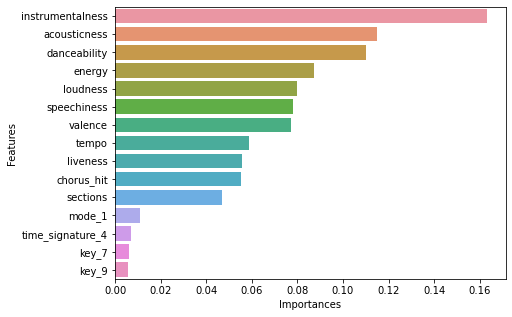

In [326]:
sns.barplot(data = inpp ,x = 'Importances',y = 'Features')
plt.show()

### Business Justification

The main motive is to improve the performance of the model. As per the business 
scenario, the model is predicting a substantial number of songs to be a hit when in 
reality they are not likely to be hits. In this scenario, if Spotify can predict if a song 
is likely to be a hit, then that song can be used by its recommendation system to 
recommend that song to people listening to songs of the same category or songs 
by the same artist. 

● This could help increase the time spent on the app by the users which can further 
motivate them towards purchasing premium version of the app.


● Alternatively, even if a user spends more time on the app and still doesn’t want to 
purchase the premium version, Spotify can still generate revenue by playing 
relevant advertisements in between songs.


● Music production requires the creative flow of the entire team for making a track 
but despite all their efforts they stand a high chance of failure. A model that is able 
to predict the likelihood of a song being a hit could help music producers and 
signers as well. Spotify could partner with people from the industry and share such 
information to an extent where both, the creators and Spotify, both can benefit from 
this analy